# Pattern search implementations

## Naive algorithm

The Naive String Matching algorithm slides the pattern one by one. After each slide, it one by one checks characters at the current shift and if all characters match then prints the match.
vector<int> naiveStringMatcher(t : string, p : string):
   int n = t.length
   int m = p.length
   vector<int> ans
   for i = 0 to n - m
      if t[i .. i + m - 1] == p
         ans.push_back(i)
   return ans

In [0]:
def naive(pattern, text):
    entries = []
    if len(pattern) > len(text):
        return entries
    for text_index in range(len(text) - len(pattern) + 1):
        pattern_index = 0
        while(pattern_index < len(pattern)): 
            if (text[text_index + pattern_index] != pattern[pattern_index]): 
                break
            pattern_index += 1
        if pattern_index is len(pattern):
            entries.append(text_index)
    return entries


Small test for naive algorithm.

In [0]:
text_test = 'ohoh;oh Fuck, oh, oh fucj, Fuck Fuuuuck   shiiit oh'
pattern_test = 'oh'
indexes_test = naive(pattern_test,text_test)
print(indexes_test)

[0, 2, 5, 14, 18, 49]


## Rabin-Karp algorithm

Like the Naive Algorithm, Rabin-Karp algorithm also slides the pattern one by one. But unlike the Naive algorithm, Rabin Karp algorithm matches the hash value of the pattern with the hash value of current substring of text, and if the hash values match then only it starts matching individual characters. 
 

So Rabin Karp algorithm needs to calculate hash values for following strings. 
Hash at the next shift must be efficiently computable from the current hash value and next character in text or we can say hash(txt[s+1 .. s+m]) must be efficiently computable from $hash(txt[s .. s+m-1])$ and $txt[s+m]$ i.e., $hash(txt[s+1 .. s+m])= rehash(txt[s+m]$, $hash(txt[s .. s+m-1]))$ and rehash must be O(1) operation.

The hash function suggested by Rabin and Karp calculates an integer value. The integer value for a string is numeric value of a string. For example, if all possible characters are from $1$ to $10$, the numeric value of “122” will be $122$. The number of possible characters is higher than $10$ ($256$ in general) and pattern length can be large. So the numeric values cannot be practically stored as an integer. Therefore, the numeric value is calculated using modular arithmetic to make sure that the hash values can be stored in an integer variable (can fit in memory words)

In [0]:
def robin_carp(pattern, text):
    entries = []
    if len(pattern) > len(text):
        return entries 
    hash_pattern = 0    # hash value for pattern 
    hash_text = 0    # hash value for txt 
    h = 1 # hash init
    d = 256 # is the number of characters in the input alphabet
    q = 977 # TODO compute it from args sizes
    for i in range(len(pattern) - 1): 
        h = (h * d) % q 
  
    # hash by module q
    for i in range(len(pattern)): 
        hash_pattern = (d * hash_pattern + ord(pattern[i])) % q 
        hash_text = (d * hash_text + ord(text[i])) % q 

    # Slide the pattern over text one by one 
    for i in range(len(text) - len(pattern) + 1): 
        # Check the hash values of current window
        if hash_pattern is hash_text: 
            for j in range(len(pattern)): 
                if text[i+j] != pattern[j]: 
                    break
            if j + 1 == len(pattern): 
                entries.append(i)
  
        # Calculate hash value for next window of text: Remove 
        # leading digit, add trailing digit 
        if i < len(text) - len(pattern): 
            hash_text = (d * (hash_text - ord(text[i]) * h) + ord(text[i + len(pattern)])) % q 
            # We might get negative values of t
            if hash_text < 0: 
                hash_text = hash_text + q 
    return entries

Small test for Robin-Carp algorithm.

In [0]:
text_test = 'ohoh;oh Fuck, oh, oh fucj, Fuck Fuuuuck   shiiit oh'
pattern_test = 'oh'
#text_test = 'aaaaaaaaaaa'
#pattern_test = 'a'
indexes_test = robin_carp(pattern_test, text_test)
print(indexes_test)

[0, 2, 5, 14, 18, 49]


## Knuth Morris Pratt algorithm

The Naive pattern searching algorithm does not work well in cases where we see many matching characters followed by a mismatching character. 

The KMP matching algorithm uses degenerating property (pattern having same sub-patterns appearing more than once in the pattern) of the pattern and improves the worst case complexity to $O(n)$. The basic idea behind KMP’s algorithm is: whenever we detect a mismatch (after some matches), we already know some of the characters in the text of the next window. We take advantage of this information to avoid matching the characters that we know will anyway match. 

In [0]:
def prefix(string):
    prefix_function = [0] * len(string)
    for i in range(1,len(string)):
        k = prefix_function[i-1]
        while k > 0 and string[k] != string[i]:
            k = prefix_function[k-1]
        if string[k] == string[i]:
            k = k + 1
        prefix_function[i] = k
    return prefix_function

def kmp(pattern, text):
    entries = []
    if len(pattern) > len(text):
        return entries
    prefix_function = prefix(pattern)
    text_index = pattern_index = 0
    while text_index < len(text) and pattern_index < len(pattern):
        if text[text_index] == pattern[pattern_index]:
            if pattern_index == len(pattern) - 1:
                entries.append(text_index - len(pattern) + 1)
                pattern_index = 0
            else:
                pattern_index += 1
            text_index += 1
        elif pattern_index is not 0:     
            pattern_index = prefix_function[pattern_index-1]
        else:
            text_index += 1
    return entries

Small test for KMP algorithm.

In [0]:
text_test = 'ohoh;oh Fuck, oh, oh fucj, Fuck Fuuuuck   shiiit oh'
pattern_test = 'oh'
indexes_test = kmp(pattern_test,text_test)
print(indexes_test)

[0, 2, 5, 14, 18, 49]


## Boyer–Moore–Horspool algorithm

In [0]:
from copy import deepcopy

def get_int_image(x):
    image_dict = {}
    length = len(x)
    for idx, char in enumerate(x[:-1], start=1):
        # if char not in image_dict:
        image_dict[char] = length-idx

    if x[-1] not in image_dict:
        image_dict[x[-1]] = length

    image_dict['other'] = length

    return image_dict


def bmh(pattern, text):
    entries = []
    if len(pattern) > len(text):
        return entries
    image_dict = get_int_image(pattern)
    length_text = len(text)
    length_pattern = image_dict['other']
    i = length_pattern  # for text
    j = length_pattern  # for pattern
    entry_point = length_pattern  # for position in full string
    while i <= length_text:
        if text[i-1] == pattern[j-1] and j>0:
            i -= 1
            j -= 1
        else:
            if j == 0:
                entries.append(entry_point - length_pattern)
            try:
                entry_point += image_dict[text[i-1]]
            except:
                entry_point += image_dict['other']
            i = deepcopy(entry_point)
            j = length_pattern
    return entries


In [0]:
text_test = 'ohoh;oh Fuck, oh, oh fucj, Fuck Fuuuuck   shiiit oh'
pattern_test = 'oh'
indexes_test = bmh(pattern_test,text_test)
print(indexes_test)

[0, 2, 5, 14, 18, 49]


# Bencmarking

In [0]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

BENCH_DIR = ROOT + '/My Drive/benchmark_pattern_search'

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
all_methods = [naive, robin_carp, kmp, bmh]
bad_patterns = []
bad_texts = []
good_patterns = []
good_texts = []
bad_files = []
good_files = []
for i in range(1,5):
    bad_files.append('bad_t_' + str(i) +'.txt')
    good_files.append( 'good_t_' + str(i) +'.txt')

    with open(BENCH_DIR + '/' + bad_files[-1], 'r') as file:
        bad_texts.append(file.read())
    with open(BENCH_DIR + '/bad_w_' + str(i) +'.txt', 'r') as file:
        bad_patterns.append(file.read())
    with open(BENCH_DIR + '/' +good_files[-1], 'r') as file:
        good_texts.append(file.read())
    with open(BENCH_DIR + '/bad_w_' + str(i) +'.txt', 'r') as file:
        good_patterns.append(file.read())


## Time metrics  
Different time metrics computing

In [0]:
import math 

def get_median(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN
    if not sorted:
        time_list.sort()
    if len(time_list) % 2 == 0:
        return (time_list[int(len(time_list)/2)] + time_list[int(1 + len(time_list)/2)]) / 2
    else:
        return time_list[len(time_list)/2]


def get_min(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN 
    if not sorted:
        time_list.sort()  
    return time_list[0]


def get_max(time_list, sorted = True):
    if len(time_list) is 0:
        return NaN 
    if not sorted:
        time_list.sort()  
    return time_list[-1]

def get_variance(time_list):
    if len(time_list) is 0:
        return NaN 
    mean = sum(time_list) / len(time_list) 
    variance = sum([((x - mean) ** 2) for x in time_list]) / len(time_list)
    return variance

def get_mean(time_list):
    if len(time_list) is 0:
        return NaN 
    mean = sum(time_list) / len(time_list) 
    return mean

## Time dfs
Function for collecting data frames containing median, min and max values of selected methods run time both for bad and good datasets.

In [0]:
import time
import pandas as pd

def get_time_df(num_iterations = 10, methods = [naive], len_cases = 4 ):
    time_total = pd.DataFrame(columns=['file', 'method', 'mean', 'median', 'min', 'max', 'variance'])
    df_index = 0
    for i in range(0, len_cases):
        for method in methods:
            time_good = []
            time_bad = []
            for j in range(0, num_iterations):
                t0 = time.time()
                method(good_patterns[i], good_texts[i])
                t1 = time.time()
                total = t1-t0
                time_good.append(total)

                t0 = time.time()
                method(bad_patterns[i], bad_texts[i])
                t1 = time.time()
                total = t1-t0
                time_bad.append(total)
            time_good.sort()
            time_bad.sort()
            time_total.loc[df_index] = [good_files[i], str(method.__name__), get_mean(time_good),
                                         get_median(time_good), get_min(time_good), get_max(time_good), get_variance(time_good)]
            time_total.loc[df_index + 1] = [bad_files[i], str(method.__name__), get_mean(time_bad),
                                             get_median(time_bad), get_min(time_bad), get_max(time_bad), get_variance(time_bad)]
            df_index += 2
    return time_total

## Run time statistic for all methods

In [0]:
time_df = get_time_df(num_iterations=100, methods = all_methods)
time_df

,file,method,mean,median,min,max,variance
0,good_t_1.txt,naive,0.000165,0.000162,0.000160,0.000196,4.412927e-11
1,bad_t_1.txt,naive,0.000004,0.000004,0.000004,0.000007,1.072010e-13
2,good_t_1.txt,robin_carp,0.000466,0.000455,0.000399,0.000748,3.538786e-09
3,bad_t_1.txt,robin_carp,0.000008,0.000007,0.000006,0.000015,3.303029e-12
4,good_t_1.txt,kmp,0.000175,0.000173,0.000169,0.000186,1.082128e-11
5,bad_t_1.txt,kmp,0.000006,0.000006,0.000006,0.000010,2.926072e-13
6,good_t_1.txt,bmh,0.000383,0.000380,0.000372,0.000433,1.414009e-10
7,bad_t_1.txt,bmh,0.000011,0.000010,0.000009,0.000116,1.135315e-10
8,good_t_2.txt,naive,0.000276,0.000274,0.000268,0.000406,2.122528e-10
9,bad_t_2.txt,naive,0.000138,0.000136,0.000135,0.000169,2.517197e-11


## Graphs comparison

In [0]:
def plot_time_charts(time_df, files, methods = [naive, robin_carp, kmp, bmh], begin_index = 'method', end_index = 'max'):
  methods_names = []
  for method in methods:
    methods_names.append(str(method.__name__))
  for file in files:
    df_concrete_file = time_df.loc[lambda df: (df['file'] == file), begin_index:end_index]
    df_concrete_file_concrete_methods = df_concrete_file.loc[df_concrete_file['method'].isin(methods_names)]
    df_concrete_file_concrete_methods.plot(kind ='bar', x='method', title = file, position = 1)

### All methods

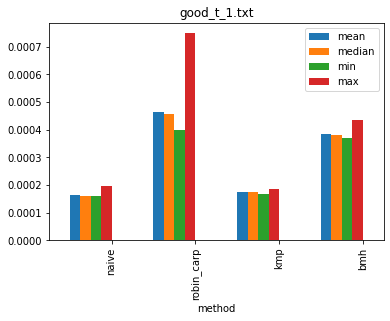

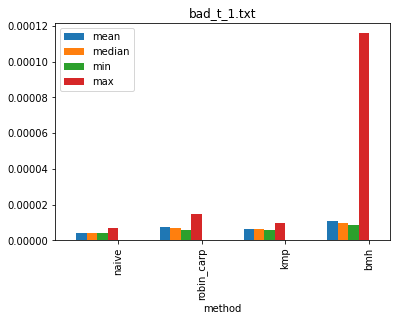

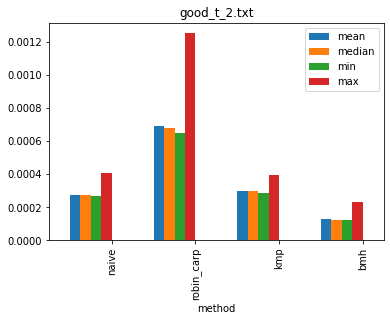

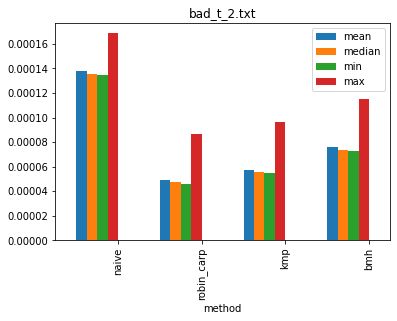

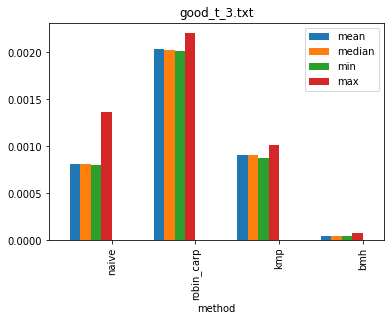

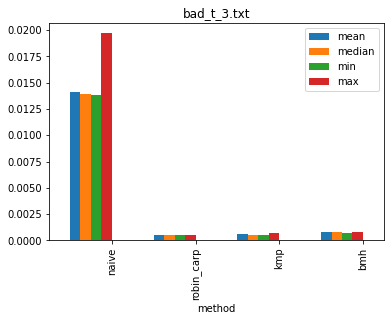

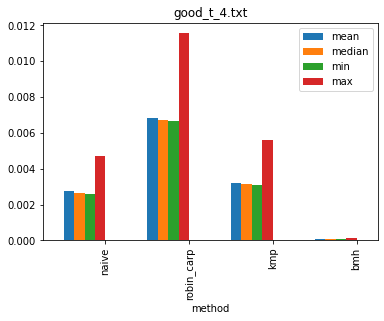

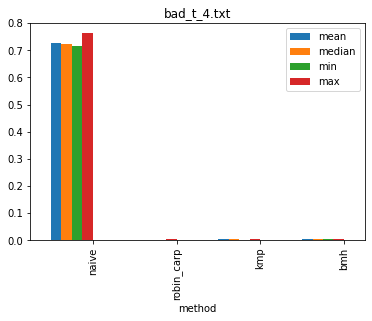

In [0]:
for i in range(0, len(good_files)):
  plot_time_charts(time_df, files = [good_files[i], bad_files[i]])

The largest bad case has significant improvements for non-trivial algorithms on naive one.
What is the faster  among them?


### Non-trivial methods

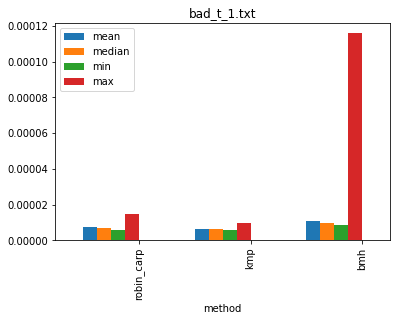

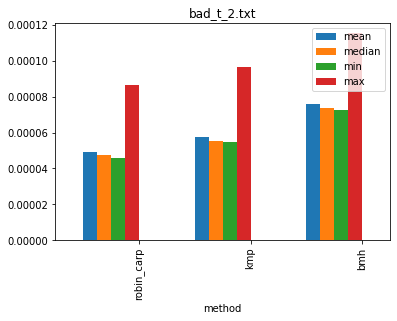

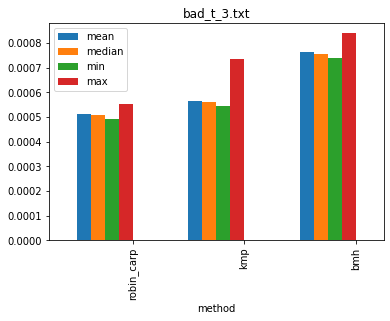

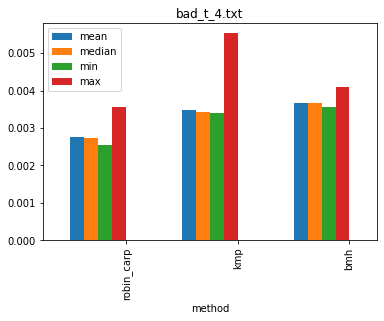

In [0]:
non_trivial_methods = [robin_carp, kmp, bmh]
plot_time_charts(time_df, files = bad_files, methods = non_trivial_methods)

**Robin carp algorithm shows better perfomance for all provided bad cases.**


# Summary 
For easy cases, naive and BMH algorithm are better than others. For small ones naive has no overheads, that is the fastest one for small computattion flow. For longer cases, BMH takes its leadearship. 

For bad cases, Robin Carp algorithm has the fastest results between others. For large bad cases, it is starting to be clear, why other algorithms are exist, since their speed up is more than $100$ times.

# Back UP
Not for presentation.


In [0]:
import time
import pandas as pd

def get_time(num_iterations = 10, method = naive):
    time_good_metrics = pd.DataFrame(columns=['median', 'min', 'max'])
    time_bad_metrics = pd.DataFrame(columns=['median', 'min', 'max'])
    for i in range(0,4):
        time_good = []
        time_bad = []
        for j in range(0, num_iterations):
            t0 = time.time()
            method(good_patterns[i], good_texts[i])
            t1 = time.time()
            total = t1-t0
            time_good.append(total)

            t0 = time.time()
            method(bad_patterns[i], bad_texts[i])
            t1 = time.time()
            total = t1-t0
            time_bad.append(total)
        time_good.sort()
        time_bad.sort()
        time_good_metrics.loc[i] = [time_good[int(num_iterations/2)], time_good[0], time_good[-1]]
        time_bad_metrics.loc[i] = [time_bad[int(num_iterations/2)], time_bad[0], time_bad[-1]]
    return time_good_metrics, time_bad_metrics

## Naive time

In [0]:
naive_good, naive_bad = get_time(num_iterations=100, method = naive)
print('Good datasets')
print(naive_good)
print('Bad datasets')
print(naive_bad)
naive_good

Good datasets
     median       min       max
0  0.000154  0.000151  0.000421
1  0.000260  0.000254  0.000664
2  0.000766  0.000756  0.001333
3  0.002520  0.002486  0.003074
Bad datasets
     median       min       max
0  0.000004  0.000004  0.000083
1  0.000130  0.000129  0.000277
2  0.013349  0.013261  0.022739
3  0.760065  0.753563  0.781395


,median,min,max
0,0.000154,0.000151,0.000421
1,0.000260,0.000254,0.000664
2,0.000766,0.000756,0.001333
3,0.002520,0.002486,0.003074


##  Robin Carp time

In [0]:
rb_good, rb_bad = get_time(num_iterations=1000, method = robin_carp)
print('Good datasets')
print(rb_good)
print(rb_bad)

Good datasets
     median       min       max
0  0.000387  0.000378  0.000865
1  0.000643  0.000623  0.001213
2  0.001909  0.001885  0.003557
3  0.006238  0.006060  0.011148
     median       min       max
0  0.000006  0.000005  0.000216
1  0.000045  0.000043  0.000099
2  0.000471  0.000456  0.000858
3  0.002436  0.002384  0.004813


## Knuth Morris Pratt time

In [0]:
kmp_good, kmp_bad = get_time(num_iterations=1000, method = kmp)
print('Good datasets')
print(kmp_good)
print('Bad datasets')
print(kmp_bad)

Good datasets
     median       min       max
0  0.000170  0.000164  0.000286
1  0.000291  0.000279  0.000728
2  0.000894  0.000860  0.002027
3  0.003091  0.003063  0.005820
Bad datasets
     median       min       max
0  0.000006  0.000005  0.000032
1  0.000055  0.000052  0.000139
2  0.000554  0.000534  0.001112
3  0.003395  0.003352  0.006148


## BMH time

In [0]:
bmh_good, bmh_bad = get_time(num_iterations=10, method = bmh)
print('Good datasets')
print(bmh_good)
bmh_good
bmh_bad
print('Bad datasets')
print(bmh_bad)

NameError: ignored